## Übung 3

### DBSCAN

In dieser Übung werden wir den Algorithmus DBSCAN nutzen, um die Patienten im Diabetes Datensatz zu gruppieren.
Lade hierfür zunächst das Datenset über Scikit-Learn. 

In [4]:
# import necessary modules:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster, metrics

# load dataset:
diab = datasets.load_diabetes()

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

Nutze nun die DBSCAN Klasse des Cluster Moduls: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

Hier ein Beispiel für eine Klassifizierung mit DBSCAN: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

In [53]:
# Erzeuge eine Instanz der DBSCAN Klasse
# Nutze verschiedene Instanzen, um unterschiedliche Parameter Werte auszuprobieren

db = cluster.DBSCAN(0.01,5,metric='euclidean') # first give distance epsilon, second give min no. of points

# Clustere den Datensatz
X = diab.data[:,2:4] # define which parameters should be used (e.g. age + s4)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [54]:
# Calculate parameters:
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 10


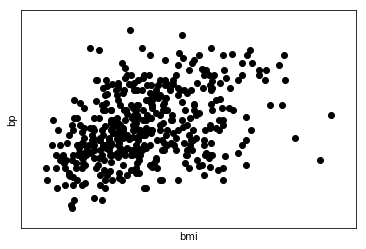

In [55]:
# Plot outputs
plt.scatter(X[:, 0], X[:,1],  color='black') # print "real" values in black
#plt.plot(X_test[:, np.newaxis, 2], y_pred, color='blue', linewidth=3)

plt.xlabel('bmi')
plt.ylabel('bp')
plt.xticks(())
plt.yticks(())

plt.show()

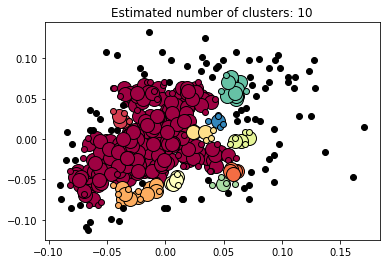

In [56]:
# Visualisere die Ergebnisse

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()